# Practice KNN,LR,SVM

# Contnet <a id='Jump'></a>

##   1.[Import and reading the Data Section](#imports)
---
##   2.[Exploration](#EDA)<br>
---
##   3.[DataPreprocess](#preprocess)
###  <br>3.1.[Clean NA values](#NA)

###  <br>3.2.[Scalling](#scaling)
###  <br>3.3.[Clean Duplication](#Duplication)<br>
---
## 2.[Modeling](#Models)<br>
### 2.1.[KNN](#KNN)
### 2.2.[Logistic  Regression](#lr)
### 2.3.[SVM](#svm)

## imports
<a id='imports'></a>
##### [Contnet](#Jump)

In [37]:
from jupyterthemes import jtplot
jtplot.style(theme='grade3' , context='talk', fscale=1.4, spines=False, gridlines='--' , ticks=True,figsize=(6, 4.5) )

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')
from IPython.display import display, HTML
#preprocess
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

#model selection
from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score, cross_val_predict

#models.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#validation 
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve

In [3]:
#at kaggels 
# df = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
#on my PC 
df = pd.read_csv('diabetes.csv')
print(df.shape)
df.head(1)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


### Helps

In [4]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

## Exploration
<a id='EDA'></a>
##### [Contnet](#Jump)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- all int or float that makes things simpler 
- also there is no na here

In [6]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


- no duplicates in the data

In [7]:
 df.nunique(axis=0).sort_values().to_frame()

,0
Outcome,2
Pregnancies,17
BloodPressure,47
SkinThickness,51
Age,52
Glucose,136
Insulin,186
BMI,248
DiabetesPedigreeFunction,517


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

the columns info 

    Pregnancies:	"Number of times pregnant"
    Glucose:	Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    BloodPressure:	"Diastolic blood pressure (mm Hg)"
    SkinThickness:	Triceps skin fold thickness (mm)
    Insulin:	2-Hour serum insulin (mu U/ml)
    BMI:	Body mass index (weight in kg/(height in m)^2)
    DiabetesPedigreeFunction:	Diabetes pedigree function
    Age:	Age (years)
    Outcome:	Class variable (0 or 1) 268 of 768 are 1, the others are 0

[source](https://machinelearningmastery.com/case-study-predicting-the-onset-of-diabetes-within-five-years-part-1-of-3/)
A particularly interesting attribute used in the study was the **Diabetes Pedigree Function**, pedi. It provided some data on diabetes mellitus history in relatives and the genetic relationship of those relatives to the patient. This measure of genetic influence gave us an idea of the hereditary risk one might have with the onset of diabetes mellitus. Based on observations in the proceeding section, it is unclear how well this function predicts the onset of diabetes.

[anothersource](https://rpubs.com/ikodesh/53189)
According to http://www.personal.kent.edu/~mshanker/personal/Zip_files/sar_2000.pdf, the diabetes pedigree function provides “a synthesis of the diabetes mellitus history in relatives and the genetic relationship of those relatives to the subject.” It utilizes information from a person’s family history to predict how diabetes will affect that individual. According to http://www.rci.rutgers.edu/~cabrera/587/pima.pdf, “many Pima Indians have diabetes”. I was intrigued at why this might be and what variables may influence this. To test the relationship between BMI and the number of times the women were pregnant, I will compare the two variables visually.

columns cant be zeros ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'Age' , 'DiabetesPedigreeFunction']

In [10]:
 #this rename for much easiar read 
df.rename(columns={'DiabetesPedigreeFunction': 'pedi'},inplace=True)

In [11]:
Cant_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'Age' ,'pedi']
df[Cant_zeros] = df[Cant_zeros].replace(0, np.nan)

In [12]:
df[Cant_zeros].describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,pedi
count,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000
mean,121.686763,72.405184,29.153420,155.548223,32.457464,33.240885,0.471876
std,30.535641,12.382158,10.476982,118.775855,6.924988,11.760232,0.331329
min,44.000000,24.000000,7.000000,14.000000,18.200000,21.000000,0.078000
25%,99.000000,64.000000,22.000000,76.250000,27.500000,24.000000,0.243750
50%,117.000000,72.000000,29.000000,125.000000,32.300000,29.000000,0.372500
75%,141.000000,80.000000,36.000000,190.000000,36.600000,41.000000,0.626250
max,199.000000,122.000000,99.000000,846.000000,67.100000,81.000000,2.420000


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


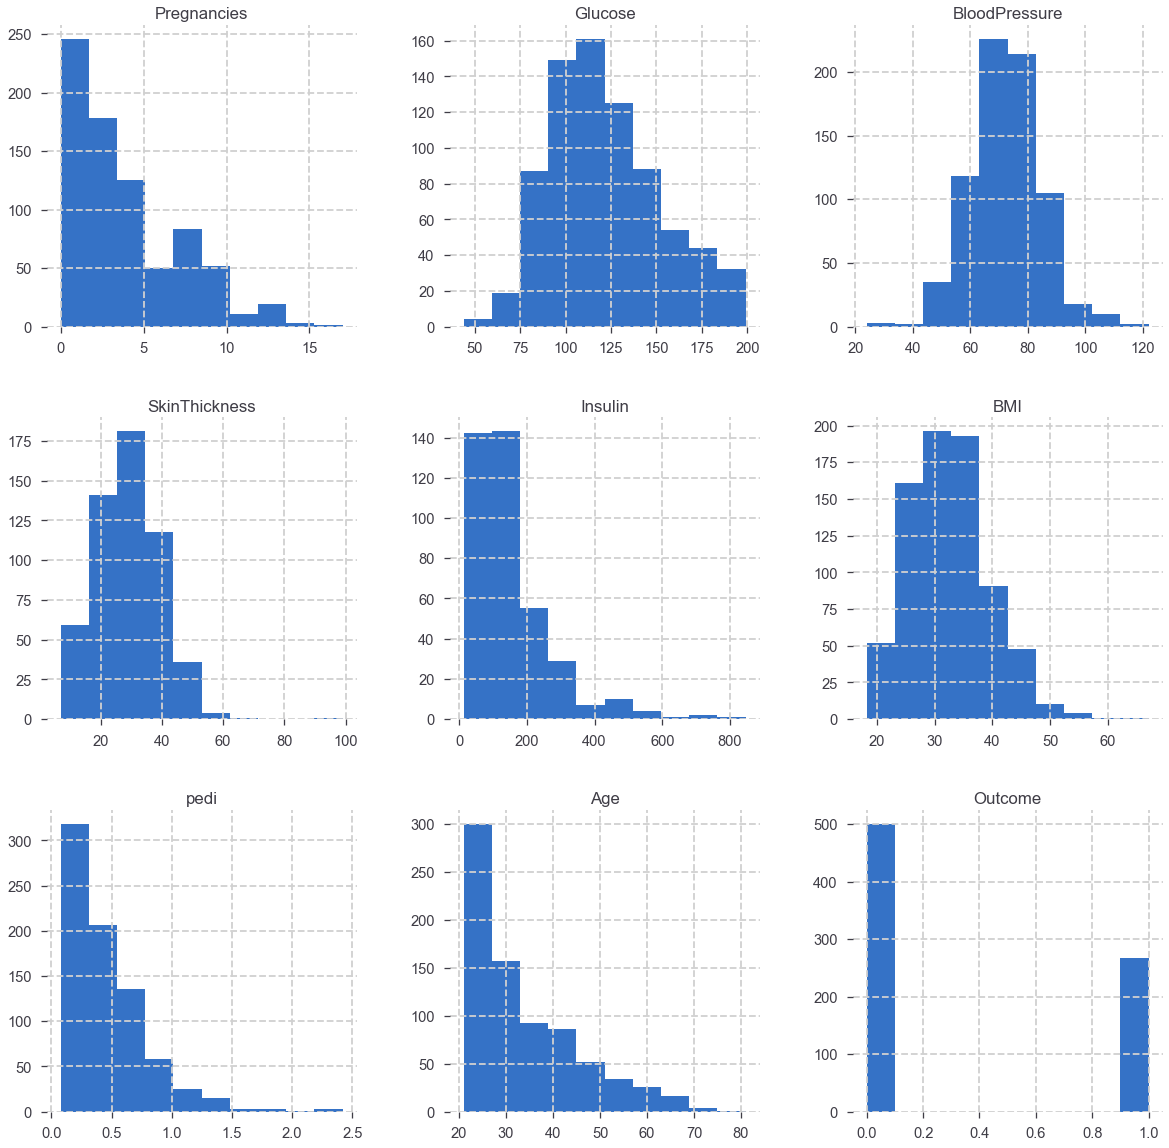

In [14]:
 df.hist(figsize = (20,20));

In [15]:
na = df.isna().sum().sort_values(ascending =False)
NA = na[na>0].to_frame()
NA.columns = ['Nulls']

In [16]:
explorenulls ='display_side_by_side(NA,df[NA.index.to_list()].nunique(axis=0).to_frame().set_axis(["uniqu"], axis=1))'

,Nulls
Insulin,374
SkinThickness,227
BloodPressure,35
BMI,11
Glucose,5
,uniqu
Insulin,185
SkinThickness,50
BloodPressure,46
BMI,247


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,pedi,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1
755,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1
760,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0


,Insulin
count,394.000000
mean,155.548223
std,118.775855
min,14.000000
25%,76.250000
50%,125.000000
75%,190.000000
max,846.000000


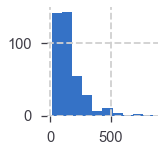

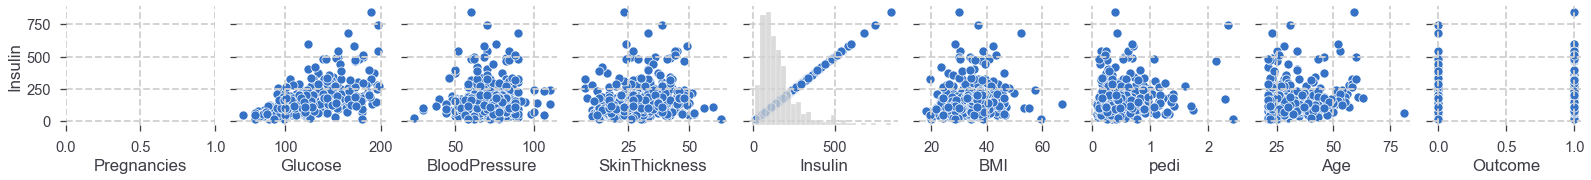

In [17]:
exec(explorenulls)
df.Insulin.hist(figsize = (2,2));
display(df[~df.Insulin.isna()])
display(df[['Insulin']].describe())
sns.pairplot(df, y_vars="Insulin", x_vars=df.columns.values);

i will fill inslun with median as there is no realy connetction betweet it and other var to help me fill it and the var of the data is really big i cant just fill it with the mean that might ruin the data and this column need some expert to help me fill it 
<a id='deal_with_Insulin'></a>

,Nulls
Insulin,374
SkinThickness,227
BloodPressure,35
BMI,11
Glucose,5
,uniqu
Insulin,185
SkinThickness,50
BloodPressure,46
BMI,247


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,pedi,Age,Outcome
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1
10,4,110.0,92.0,NaN,NaN,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123.0,72.0,NaN,NaN,36.3,0.258,52,1
758,1,106.0,76.0,NaN,NaN,37.5,0.197,26,0
759,6,190.0,92.0,NaN,NaN,35.5,0.278,66,1
762,9,89.0,62.0,NaN,NaN,22.5,0.142,33,0


,SkinThickness
count,541.000000
mean,29.153420
std,10.476982
min,7.000000
25%,22.000000
50%,29.000000
75%,36.000000
max,99.000000


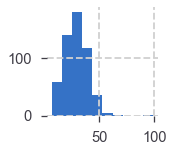

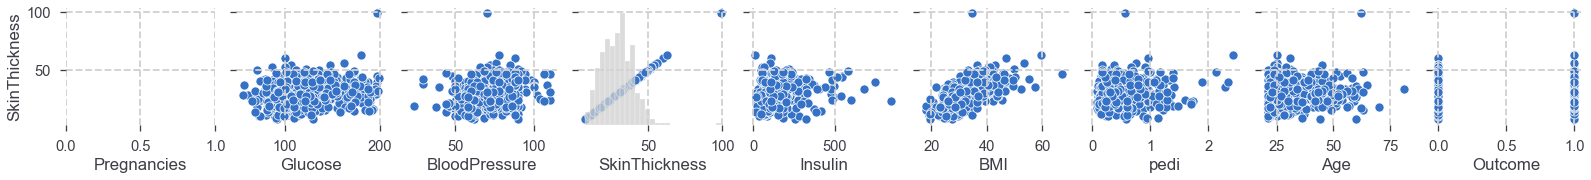

In [18]:
exec(explorenulls)
df.SkinThickness.hist(figsize = (2,2));
display(df[df.SkinThickness.isna()])
sns.pairplot(df, y_vars="SkinThickness", x_vars=df.columns.values);
display(df[['SkinThickness']].describe())

Same as The insulin fill it with median 
<a id='deal_with_SkinThickness'></a>

,Nulls
Insulin,374
SkinThickness,227
BloodPressure,35
BMI,11
Glucose,5
,uniqu
Insulin,185
SkinThickness,50
BloodPressure,46
BMI,247


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,pedi,Age,Outcome
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
15,7,100.0,NaN,NaN,NaN,30.0,0.484,32,1
49,7,105.0,NaN,NaN,NaN,NaN,0.305,24,0
60,2,84.0,NaN,NaN,NaN,NaN,0.304,21,0
78,0,131.0,NaN,NaN,NaN,43.2,0.270,26,1
81,2,74.0,NaN,NaN,NaN,NaN,0.102,22,0
172,2,87.0,NaN,23.0,NaN,28.9,0.773,25,0
193,11,135.0,NaN,NaN,NaN,52.3,0.578,40,1
222,7,119.0,NaN,NaN,NaN,25.2,0.209,37,0
261,3,141.0,NaN,NaN,NaN,30.0,0.761,27,1


,BloodPressure
count,733.000000
mean,72.405184
std,12.382158
min,24.000000
25%,64.000000
50%,72.000000
75%,80.000000
max,122.000000


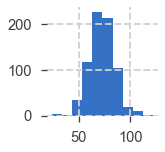

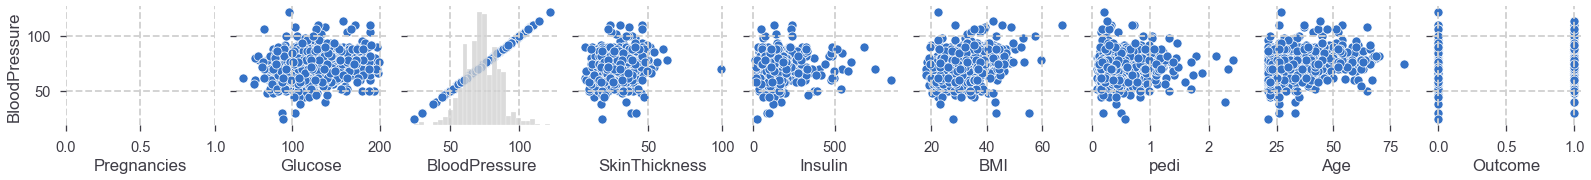

In [19]:
exec(explorenulls)
df.BloodPressure.hist(figsize = (2,2));
display(df[df.BloodPressure.isna()])
sns.pairplot(df, y_vars="BloodPressure", x_vars=df.columns.values);
display(df[['BloodPressure']].describe())

i can fill it with mean as the distrpution wont go bad 
<a id='deal_with_BloodPressure'></a>

,Nulls
Insulin,374
SkinThickness,227
BloodPressure,35
BMI,11
Glucose,5
,uniqu
Insulin,185
SkinThickness,50
BloodPressure,46
BMI,247


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,pedi,Age,Outcome
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1
49,7,105.0,NaN,NaN,NaN,NaN,0.305,24,0
60,2,84.0,NaN,NaN,NaN,NaN,0.304,21,0
81,2,74.0,NaN,NaN,NaN,NaN,0.102,22,0
145,0,102.0,75.0,23.0,NaN,NaN,0.572,21,0
371,0,118.0,64.0,23.0,89.0,NaN,1.731,21,0
426,0,94.0,NaN,NaN,NaN,NaN,0.256,25,0
494,3,80.0,NaN,NaN,NaN,NaN,0.174,22,0
522,6,114.0,NaN,NaN,NaN,NaN,0.189,26,0
684,5,136.0,82.0,NaN,NaN,NaN,0.640,69,0


,BMI
count,757.000000
mean,32.457464
std,6.924988
min,18.200000
25%,27.500000
50%,32.300000
75%,36.600000
max,67.100000


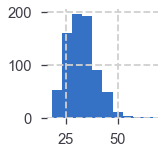

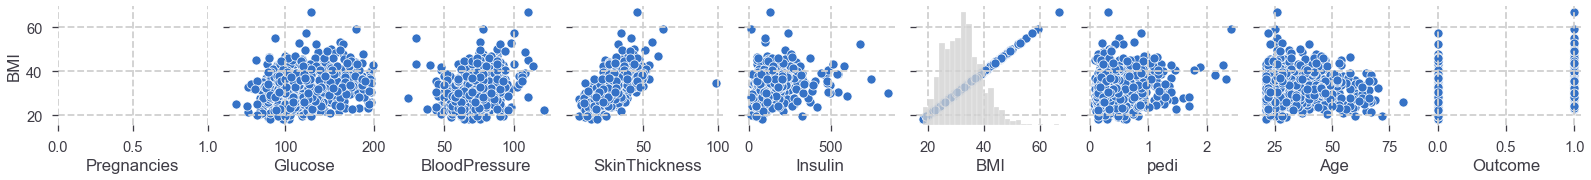

In [20]:
exec(explorenulls)
df.BMI.hist(figsize = (2,2));
display(df[df.BMI.isna()])
sns.pairplot(df, y_vars="BMI", x_vars=df.columns.values);
display(df[['BMI']].describe())

i can use skinthickness to help me fill the data here create small regressing model 
<a id='deal_with_BMI'></a>

,Nulls
Insulin,374
SkinThickness,227
BloodPressure,35
BMI,11
Glucose,5
,uniqu
Insulin,185
SkinThickness,50
BloodPressure,46
BMI,247


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,pedi,Age,Outcome
75,1,NaN,48.0,20.0,NaN,24.7,0.140,22,0
182,1,NaN,74.0,20.0,23.0,27.7,0.299,21,0
342,1,NaN,68.0,35.0,NaN,32.0,0.389,22,0
349,5,NaN,80.0,32.0,NaN,41.0,0.346,37,1
502,6,NaN,68.0,41.0,NaN,39.0,0.727,41,1


,Glucose
count,763.000000
mean,121.686763
std,30.535641
min,44.000000
25%,99.000000
50%,117.000000
75%,141.000000
max,199.000000


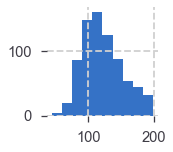

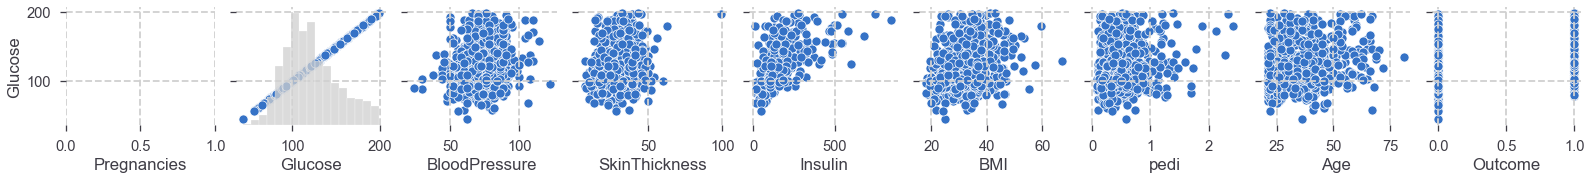

In [21]:
exec(explorenulls)
df.Glucose.hist(figsize = (2,2));
display(df[df.Glucose.isna()])
sns.pairplot(df, y_vars="Glucose", x_vars=df.columns.values);
display(df[['Glucose']].describe())

i will fill it with mean 
<a id='deal_with_Glucose'></a>


##  3.[DataPreprocess](#preprocess)
<a id='preprocess'></a>
##### [Contnet](#Jump)

#### split the data set before continue 

In [22]:
TrainDF, TestDF = train_test_split(df, test_size=0.2, random_state=9110)

### 3.1.[Clean NA values](#NA)
<a id='NA'></a>
##### [Contnet](#Jump)

[Insulin](#deal_with_Insulin)

In [23]:
col = 'Insulin' 
TrainDF[col].fillna(TrainDF[col].median(), inplace = True)
TestDF[col].fillna(TrainDF[col].median(), inplace = True)

[deal with SkinThickness](#deal_with_SkinThickness)

In [24]:
col = 'SkinThickness' 
TrainDF[col].fillna(TrainDF[col].median(), inplace = True)
TestDF[col].fillna(TrainDF[col].median(), inplace = True)

[deal with BloodPressure](#deal_with_BloodPressure)

In [25]:
col = 'BloodPressure' 
TrainDF[col].fillna(TrainDF[col].mean(), inplace = True)
TestDF[col].fillna(TrainDF[col].mean(), inplace = True)

[deal with BMI](#deal_with_BMI)

In [26]:
from sklearn.linear_model import LinearRegression
data = TrainDF[['SkinThickness','BMI']][TrainDF.BMI.notna()] # load data set
X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
TrainDF.loc[TrainDF.BMI.isna(),'BMI']= linear_regressor.predict(TrainDF['SkinThickness'][TrainDF.BMI.isna()].values.reshape(-1, 1) )
TestDF.loc[TestDF.BMI.isna(),'BMI']= linear_regressor.predict(TestDF['SkinThickness'][TestDF.BMI.isna()].values.reshape(-1, 1) ) 

[deal with Glucose](#deal_with_Glucose)

In [27]:
col = 'Glucose' 
TrainDF[col].fillna(TrainDF[col].mean(), inplace = True)
TestDF[col].fillna(TrainDF[col].mean(), inplace = True)

In [29]:
TrainDF.isna().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
pedi             0
Age              0
Outcome          0
dtype: int64

In [30]:
TestDF.isna().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
pedi             0
Age              0
Outcome          0
dtype: int64

#### 3.2.[Data Scaling ](#scaling) 
<a id='scaling'></a>
##### [Contnet](#Jump)

In [31]:
features = df.columns.to_list()
features.pop(-1)
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'pedi',
 'Age']

In [32]:
scaler = StandardScaler()
TrainDF[features] = scaler.fit_transform(TrainDF[features])
TestDF[features] = scaler.transform(TestDF[features])

### 3.3.[Clean Duplication](#Duplication)
<a id='Duplication'></a>
##### [Contnet](#Jump)

In [34]:
TestDF[TestDF.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,pedi,Age,Outcome


In [35]:
TrainDF[TrainDF.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,pedi,Age,Outcome


In [52]:
X_train,y_train = TrainDF.drop(['Outcome'],axis = 1),TrainDF[['Outcome']]
X_test,y_test = TestDF.drop(['Outcome'],axis = 1),TestDF[['Outcome']]

## 3.[Modeling](#Models)
<a id='Models'></a>
##### [Contnet](#Jump)


### 3.1.[KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
<a id='KNN'></a>
##### [Contnet](#Jump)

In [78]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [*range(1,20)],
}
Grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5, scoring='roc_auc',n_jobs=-1)

Grid_search.fit(X_train , y_train)
Grid_search.best_estimator_
finalknn  = Grid_search.best_estimator_
finalknn.fit(X_train,y_train )
y_model = finalknn.predict(X_test)
print('roc_auc_score : ', roc_auc_score(y_test, y_model))
print('accuracy_score : ', accuracy_score(y_test, y_model))
print('recall_score : ', recall_score(y_test, y_model))
print('precision : ', precision_score(y_test, y_model))
print('f1_score : ', f1_score(y_test, y_model))

roc_auc_score :  0.7483333333333332
accuracy_score :  0.7727272727272727
recall_score :  0.6666666666666666
precision :  0.6792452830188679
f1_score :  0.6728971962616822


### 2.2.Logistic Regression
<a id='lr'></a>
##### [Contnet](#Jump)

(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

Cfloat, default=1.0
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

In [92]:
lr = LogisticRegression(random_state=9110,n_jobs=-1,max_iter=100)
param_grid = {
    'C': [0.0001, 0.001, 0.01,0.1,1,5],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
}

Grid_search = GridSearchCV(lr, param_grid=param_grid, cv=5, scoring='roc_auc',n_jobs=-1)

Grid_search.fit(X_train , y_train)
Grid_search.best_estimator_
finallr = Grid_search.best_estimator_
finallr.fit(X_train,y_train )
y_model = finallr.predict(X_test)
print('roc_auc_score : ', roc_auc_score(y_test, y_model))
print('accuracy_score : ', accuracy_score(y_test, y_model))
print('recall_score : ', recall_score(y_test, y_model))
print('precision : ', precision_score(y_test, y_model))
print('f1_score : ', f1_score(y_test, y_model))
finallr

roc_auc_score :  0.7455555555555555
accuracy_score :  0.7857142857142857
recall_score :  0.6111111111111112
precision :  0.7333333333333333
f1_score :  0.6666666666666666


LogisticRegression(C=0.1, n_jobs=-1, random_state=9110, solver='liblinear')

### 2.3[SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
<a id='svm'></a>
##### [Contnet](#Jump)

C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)[source]¶

kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf

In [101]:
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

In [107]:
svm = SVC(random_state = 9110)
param_grid = {
    'C': [0.0001, 0.001, 0.01,0.1,1,5],
    'kernel': ['linear', 'poly', 'rbf','sigmoid'],
    'degree': [2,3,4,5],
    'shrinking': [True,False]
}

Grid_search = GridSearchCV(svm, param_grid=param_grid, cv=5, scoring='roc_auc',n_jobs=-1)

Grid_search.fit(X_train , y_train)
Grid_search.best_estimator_
finalsvm = Grid_search.best_estimator_
finalsvm.fit(X_train,y_train )
y_model = finalsvm.predict(X_test)
print('roc_auc_score : ', roc_auc_score(y_test, y_model))
print('accuracy_score : ', accuracy_score(y_test, y_model))
print('recall_score : ', recall_score(y_test, y_model))
print('precision : ', precision_score(y_test, y_model))
print('f1_score : ', f1_score(y_test, y_model))
finalsvm

roc_auc_score :  0.7212962962962962
accuracy_score :  0.7597402597402597
recall_score :  0.5925925925925926
precision :  0.6808510638297872
f1_score :  0.6336633663366336


SVC(C=0.1, degree=2, kernel='linear', random_state=9110)